We study the angular separation of the $H_0$ anisotropy of the same lightcone constrained by different relations or statistiscal methods. If different relations match closely, means we can safely combine the bootstrapping scanning results to make a joint constraint. If they don't, we might not be able to do so. And it means the $H_0$ variation arises more due to statistical noise rather than cosmic variance, where in the latter case the anisotropy should persist in all relations.

# Read and plot
We calculate the angular separation between two relations and make histogram of the angular separation. Considering also different relations. A total of 3 + 3 + 3 comparisons can be made. 

Different methods plus different relations feels like a niche case to do. The combined results makes more sense.

In [1]:
import pandas as pd
data = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/analysis_all/h0_angle_constraints.csv')

In [2]:
data

,Unnamed: 0,Relations,Glons_mc,Glats_mc,Lightcone,Glons_scan,Glats_scan
0,0,LX-T,-36.814270,-5.629965,0,-12.0,24.0
1,1,LX-T,24.012234,50.750909,1,96.0,44.0
2,2,LX-T,59.950528,40.896034,2,108.0,26.0
3,3,LX-T,-35.861733,-51.425962,3,92.0,-34.0
4,4,LX-T,59.888450,-17.859239,4,28.0,-32.0
...,...,...,...,...,...,...,...
5164,5164,M-T,-23.925592,6.701162,1723,-28.0,-14.0
5165,5165,M-T,24.024352,1.719173,1724,16.0,-26.0
5166,5166,M-T,59.998874,-7.240764,1725,8.0,6.0
5167,5167,M-T,-155.982213,32.934244,1726,-176.0,24.0


scan, LX-T, YSZ-T, Percentage of theta<60 is 0.3377829367382472
scan, LX-T, M-T, Percentage of theta<60 is 0.583284968078932
scan, YSZ-T, M-T, Percentage of theta<60 is 0.4474753337202554
mc, LX-T, YSZ-T, Percentage of theta<60 is 0.391758560650029
mc, LX-T, M-T, Percentage of theta<60 is 0.7678467788740568
mc, YSZ-T, M-T, Percentage of theta<60 is 0.559489262913523


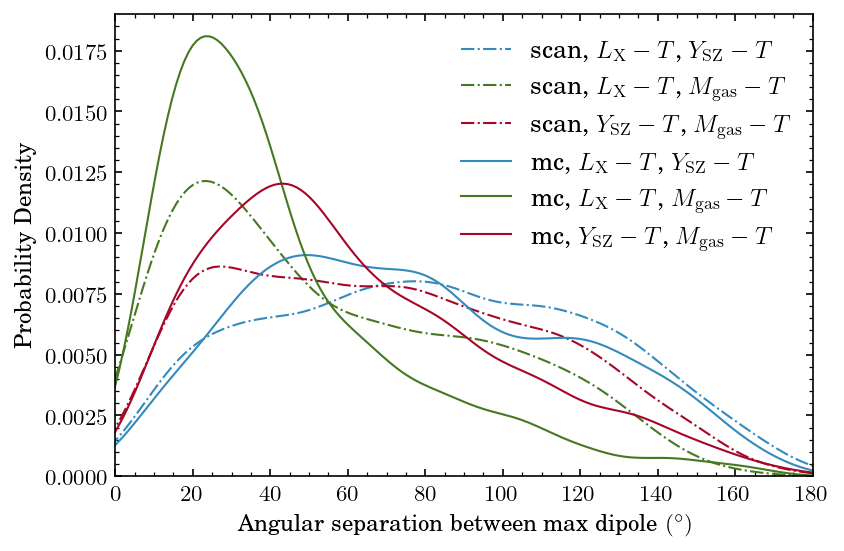

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/cosma/home/do012/dc-he4/anisotropy-flamingo/tools/')
import clusterfit as cf

import itertools # for iteration all permutations

plt.style.use('./nice.mplstyle')

fig, ax = plt.subplots(figsize=(6, 4), dpi=150)

for method, ls in zip(('scan', 'mc'), ('dashdot', 'solid')):
    
    for (relation1, relation2), cl in zip(itertools.combinations(('LX-T', 'YSZ-T', 'M-T'), 2), ('#348ABD', '#467821', '#A60628')):

        xmask = data['Relations'] == relation1
        xlon = data[xmask][f'Glons_{method}'].values
        xlat = data[xmask][f'Glats_{method}'].values
        ymask = data['Relations'] == relation2
        ylon = data[ymask][f'Glons_{method}'].values
        ylat = data[ymask][f'Glats_{method}'].values

        theta = cf.angular_separation(xlon, xlat, ylon, ylat)
        print(f'{method}, {relation1}, {relation2}, Percentage of theta<60 is {np.sum(theta<60)/len(theta)}')
        sns.kdeplot(theta, 
                    linestyle=ls,
                    color=cl,
                    label=f'{method}, {cf.latex_relation(relation1)}, {cf.latex_relation(relation2)}'
                    )

plt.xlim(0, 180)
plt.xlabel('Angular separation between max dipole $(^\circ)$')
plt.ylabel('Probability Density')
# ax.set_yticklabels([])
plt.legend()
plt.show()

How about the max dipole in terms of significance?

In [29]:
import pandas as pd
data1 = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/analysis_all/h0_direct_compare.csv')
data1

,Relations,Delta_H0,Significance,Glon,Glat,Lightcone
0,$L_\mathrm{{X}}-T$,0.051844,2.516666,-22.827893,13.043280,0
1,$L_\mathrm{{X}}-T$,0.037929,1.659783,96.000000,59.000000,1
2,$L_\mathrm{{X}}-T$,0.030997,1.234326,121.076069,36.009879,2
3,$L_\mathrm{{X}}-T$,0.052323,1.836374,103.455472,-22.855878,3
4,$L_\mathrm{{X}}-T$,0.065447,2.400472,62.246994,-27.317668,4
...,...,...,...,...,...,...
4472,$M_\mathrm{{gas}}-T$,0.016548,1.677069,-160.000000,-9.000000,1722
4473,$M_\mathrm{{gas}}-T$,0.008278,0.962696,-38.562116,-3.216106,1723
4474,$M_\mathrm{{gas}}-T$,0.011073,0.834049,16.000000,-26.000000,1724
4475,$M_\mathrm{{gas}}-T$,0.008286,1.212382,19.000164,16.437955,1725


mc, $L_\mathrm{{X}}-T$, $Y_\mathrm{{SZ}}-T$, Percentage of theta<60 is 0.3640319071791153
mc, $L_\mathrm{{X}}-T$, $M_\mathrm{{gas}}-T$, Percentage of theta<60 is 0.6185641769398115
mc, $Y_\mathrm{{SZ}}-T$, $M_\mathrm{{gas}}-T$, Percentage of theta<60 is 0.49746192893401014


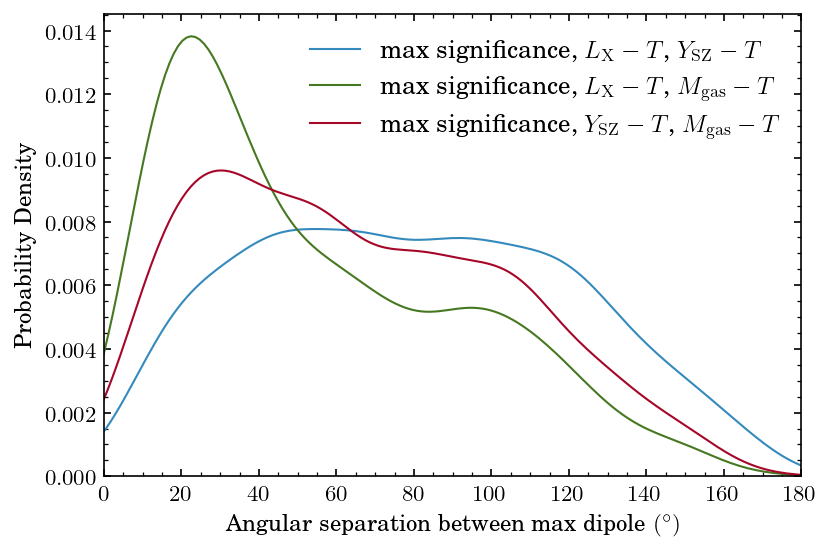

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/cosma/home/do012/dc-he4/anisotropy-flamingo/tools/')
import clusterfit as cf

import itertools # for iteration all permutations

plt.style.use('./nice.mplstyle')

fig, ax = plt.subplots(figsize=(6, 4), dpi=150)

for (relation1, relation2), cl in zip(itertools.combinations(('$L_\\mathrm{{X}}-T$', '$Y_\\mathrm{{SZ}}-T$', '$M_\\mathrm{{gas}}-T$'), 2), ('#348ABD', '#467821', '#A60628')):

    mask1 = data1['Relations'] == relation1
    mask2 = data1['Relations'] == relation2
    data_match_lc = pd.merge(data1[mask1], data1[mask2], on='Lightcone', how='inner')

    xlon = data_match_lc[f'Glon_x'].values
    xlat = data_match_lc[f'Glat_x'].values

    ylon = data_match_lc[f'Glon_y'].values
    ylat = data_match_lc[f'Glat_y'].values

    theta = cf.angular_separation(xlon, xlat, ylon, ylat)

    print(f'{method}, {relation1}, {relation2}, Percentage of theta<60 is {np.sum(theta<60)/len(theta)}')
    sns.kdeplot(theta, 
                linestyle='-',
                color=cl,
                label=f'max significance, {relation1}, {relation2}'
                )

plt.xlim(0, 180)
plt.xlabel('Angular separation between max dipole $(^\circ)$')
plt.ylabel('Probability Density')
# ax.set_yticklabels([])
plt.legend()
plt.show()

## Summary
Okay, let's overplot everything, at the same time make it easy to disable some methods

In [1]:
import pandas as pd
data = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/analysis_all/h0_angle_constraints.csv')
data1 = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/analysis_all/h0_direct_compare.csv')
data1

,Relations,Delta_H0,Significance,Glon,Glat,Lightcone
0,$L_\mathrm{{X}}-T$,0.051844,2.356872,-40.641361,42.472119,0
1,$L_\mathrm{{X}}-T$,0.037668,1.552214,52.866108,58.861169,1
2,$L_\mathrm{{X}}-T$,0.027505,1.120093,137.559549,44.219754,2
3,$L_\mathrm{{X}}-T$,0.052323,2.252205,103.455472,-22.855878,3
4,$L_\mathrm{{X}}-T$,0.072339,2.261565,45.534447,-30.787983,4
...,...,...,...,...,...,...
5176,$M_\mathrm{{gas}}-T$,0.011052,0.916874,-28.000000,-14.000000,1723
5177,$M_\mathrm{{gas}}-T$,0.011042,0.823058,32.600413,-25.051582,1724
5178,$M_\mathrm{{gas}}-T$,0.011063,0.942347,8.000000,6.000000,1725
5179,$M_\mathrm{{gas}}-T$,0.013835,1.479392,-176.000000,39.000000,1726


max significance, $L_\mathrm{{X}}-T$, $Y_\mathrm{{SZ}}-T$, Percentage of theta<60 is 0.3265778807180081
max significance, $L_\mathrm{{X}}-T$, $M_\mathrm{{gas}}-T$, Percentage of theta<60 is 0.6056745801968731
max significance, $Y_\mathrm{{SZ}}-T$, $M_\mathrm{{gas}}-T$, Percentage of theta<60 is 0.4707585408222351
1723
scan, LX-T, YSZ-T, Percentage of theta<60 is 0.3377829367382472
1723
scan, LX-T, M-T, Percentage of theta<60 is 0.583284968078932
1723
scan, YSZ-T, M-T, Percentage of theta<60 is 0.4474753337202554
1723
mc, LX-T, YSZ-T, Percentage of theta<60 is 0.391758560650029
1723
mc, LX-T, M-T, Percentage of theta<60 is 0.7678467788740568
1723
mc, YSZ-T, M-T, Percentage of theta<60 is 0.559489262913523


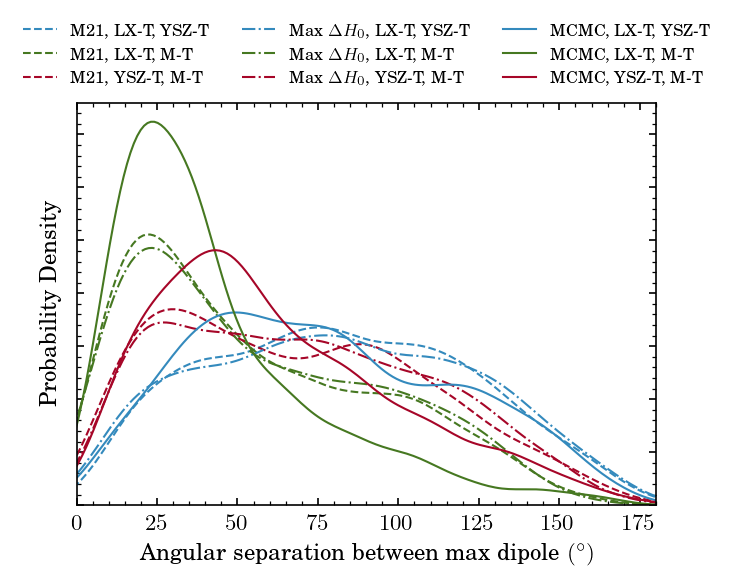

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
sys.path.append('/cosma/home/do012/dc-he4/anisotropy-flamingo/tools/')
import clusterfit as cf

import itertools # for iteration all permutations

plt.style.use('./nice.mplstyle')

fig, ax = plt.subplots(figsize=(5, 4), dpi=150)

# The M21 method
for (relation1, relation2), cl in zip(itertools.combinations(('$L_\\mathrm{{X}}-T$', '$Y_\\mathrm{{SZ}}-T$', '$M_\\mathrm{{gas}}-T$'), 2), ('#348ABD', '#467821', '#A60628')):

    mask1 = data1['Relations'] == relation1
    mask2 = data1['Relations'] == relation2
    data_match_lc = pd.merge(data1[mask1], data1[mask2], on='Lightcone', how='inner')

    xlon = data_match_lc[f'Glon_x'].values
    xlat = data_match_lc[f'Glat_x'].values

    ylon = data_match_lc[f'Glon_y'].values
    ylat = data_match_lc[f'Glat_y'].values

    theta = cf.angular_separation(xlon, xlat, ylon, ylat)

    print(f'max significance, {relation1}, {relation2}, Percentage of theta<60 is {np.sum(theta<60)/len(theta)}')
    sns.kdeplot(theta, 
                linestyle='--',
                color=cl,
                label=f'M21, 
                    {cf.text_from_latex(relation1)}, 
                    {cf.text_from_latex(relation2)}'
                )


# The 
for method, ls in zip(('scan', 'mc'), ('dashdot', 'solid')):
    
    for (relation1, relation2), cl in zip(itertools.combinations(('LX-T', 'YSZ-T', 'M-T'), 2), ('#348ABD', '#467821', '#A60628')):

        xmask = data['Relations'] == relation1
        xlon = data[xmask][f'Glons_{method}'].values
        xlat = data[xmask][f'Glats_{method}'].values
        ymask = data['Relations'] == relation2
        ylon = data[ymask][f'Glons_{method}'].values
        ylat = data[ymask][f'Glats_{method}'].values

        theta = cf.angular_separation(xlon, xlat, ylon, ylat)
        print(len(theta))
        print(f'{method}, {relation1}, {relation2}, Percentage of theta<60 is {np.sum(theta<60)/len(theta)}')

        # method labeled as scan and mc are bad
        if method == 'scan':
            method_label = 'Max $\\Delta H_0$'
        elif method == 'mc':
            method_label = 'MCMC'
    

        sns.kdeplot(theta, 
                    linestyle=ls,
                    color=cl,
                    label=f'{method_label}, {relation1}, {relation2}'
                    )
        


plt.xlim(0, 180)
plt.xlabel('Angular separation between max dipole $(^\circ)$')
plt.ylabel('Probability Density')
ax.set_yticklabels([])
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3, fontsize=8)
# plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1, fontsize=8)

plt.tight_layout()
plt.savefig('./to_paper/angular_separation_relations.png', dpi=200)
plt.show()

A guess, if we look at only lightcones with high variation? or better... to correlate the angle of separation with variation.
Sadly angular separate does not scale with variation. Maybe only slightly.

In [15]:
import pandas as pd
data1 = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/analysis_all/h0_direct_compare.csv')
data1

,Relations,Delta_H0,Significance,Glon,Glat,Lightcone
0,$L_\mathrm{{X}}-T$,0.051844,2.516666,-22.827893,13.043280,0
1,$L_\mathrm{{X}}-T$,0.037929,1.659783,96.000000,59.000000,1
2,$L_\mathrm{{X}}-T$,0.030997,1.234326,121.076069,36.009879,2
3,$L_\mathrm{{X}}-T$,0.052323,1.836374,103.455472,-22.855878,3
4,$L_\mathrm{{X}}-T$,0.065447,2.400472,62.246994,-27.317668,4
...,...,...,...,...,...,...
4472,$M_\mathrm{{gas}}-T$,0.016548,1.677069,-160.000000,-9.000000,1722
4473,$M_\mathrm{{gas}}-T$,0.008278,0.962696,-38.562116,-3.216106,1723
4474,$M_\mathrm{{gas}}-T$,0.011073,0.834049,16.000000,-26.000000,1724
4475,$M_\mathrm{{gas}}-T$,0.008286,1.212382,19.000164,16.437955,1725


1379


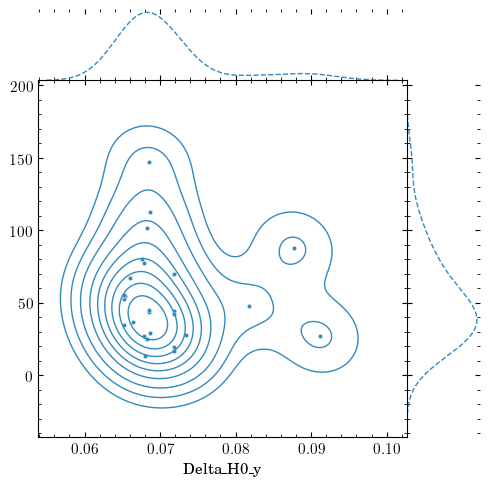

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('./nice.mplstyle')
import sys
sys.path.append('/cosma/home/do012/dc-he4/anisotropy-flamingo/tools/')
import clusterfit as cf

# select matched lightcones
mask1 = data1['Relations'] == '$M_\\mathrm{{gas}}-T$'
mask2 = data1['Relations'] == '$Y_\\mathrm{{SZ}}-T$'
data_match_lc = pd.merge(data1[mask1], data1[mask2], on='Lightcone', how='inner')
print(len(data_match_lc))

# Get the directions of these correlations and 
lon1 = data_match_lc['Glon_x'].values
lat1 = data_match_lc['Glat_x'].values
lon2 = data_match_lc['Glon_y'].values
lat2 = data_match_lc['Glat_y'].values
theta = cf.angular_separation(lon1, lat1, lon2, lat2)

# pick one of the two delta H0
delta = data_match_lc['Delta_H0_y']

g = sns.JointGrid(x=delta[delta>0.065], y=theta[delta>0.065], height=5, space=0)

# Scatter plot with smaller points
g.plot_joint(sns.kdeplot)
g.plot_marginals(sns.kdeplot)
g.plot_joint(sns.scatterplot, s=10)

plt.show()

OKay this is not good. Our expectation is like, below some delta threshold, it's all noise and angular separation are entirely independent of amplitude delta. And above some point, there is a real cosmological effect and the direction will match.

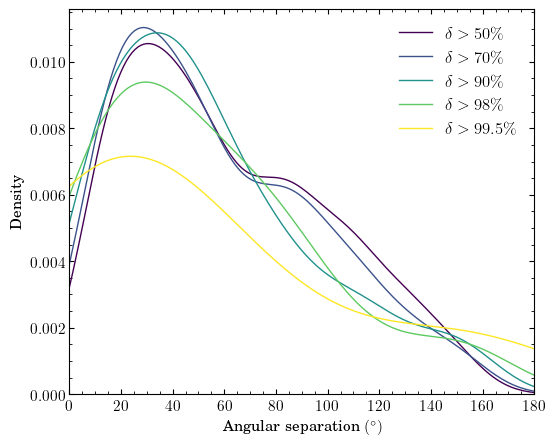

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import cm

plt.style.use('./nice.mplstyle')
import sys
sys.path.append('/cosma/home/do012/dc-he4/anisotropy-flamingo/tools/')
import clusterfit as cf

# select matched lightcones
mask1 = data1['Relations'] == '$M_\\mathrm{{gas}}-T$'
mask2 = data1['Relations'] == '$Y_\\mathrm{{SZ}}-T$'
data_match_lc = pd.merge(data1[mask1], data1[mask2], on='Lightcone', how='inner')

lon1 = data_match_lc['Glon_x'].values
lat1 = data_match_lc['Glat_x'].values
lon2 = data_match_lc['Glon_y'].values
lat2 = data_match_lc['Glat_y'].values
theta = cf.angular_separation(lon1, lat1, lon2, lat2)

# pick one of the two delta H0
delta = data_match_lc['Delta_H0_x']

fig, ax = plt.subplots(figsize = (6,5))

percentiles = [50, 70, 90, 98, 99.5]
colors = cm.viridis(np.linspace(0, 1, len(percentiles)))

for perc, color in zip(percentiles, colors):
    sns.kdeplot(theta[delta > np.percentile(delta, perc)], linestyle='-', label=f'$\\delta > {perc}\\%$', color=color)

plt.xlabel('Angular separation $(^\\circ)$')
plt.legend(fontsize=12)
plt.xlim(0, 180)
plt.show()